# 1. Don Quixote 

## About the book...

https://en.wikipedia.org/wiki/Don_Quixote

## About the author...

# 2. Don Quixote Analysis

We will answer the following questions:
- **A) Word Frequency**
    - a.1) Which are the most frequent words?
    - a.2) How many times is each word repeated?
    - a.3) What is Zipf's law? The Hapax Zipf's law in Don Quixote.
    - a.4) What is an Hapax Legomenon? Hapax Legomenon in Don Quixote.   
- **B) Word Analysis**
    - b.1) What is the word's lenght distribution?
    - b.2) 


In [1]:
# Directory & Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)


os.chdir(os.path.abspath(os.path.join('..')))
from src.data.quixote_text import QX_Text

In [2]:
# Get data
qx_text = QX_Text()
dict_quixote, dataframe_quixote = qx_text.process_raw_quixote(part_list=[1,2], 
                                                              lower=False, 
                                                              keep_escape_character=False)

print(dataframe_quixote.shape)
dataframe_quixote

(126, 4)


,Part,ChapterNumber,ChapterName,ChapterCorpus
FirstPart_ChapterNumber_1,1,1,Que trata de la condición y ejercicio del fam...,"En un lugar de la Mancha, de cuyo nombre no qu..."
FirstPart_ChapterNumber_2,1,2,Que trata de la primera salida que de su tierr...,"Hechas, pues, estas prevenciones, no quiso agu..."
FirstPart_ChapterNumber_3,1,3,Donde se cuenta la graciosa manera que tuvo D....,"Y así, fatigado de este pensamiento, abrevió..."
FirstPart_ChapterNumber_4,1,4,De lo que le sucedió a nuestro caballero cuan...,La del alba sería cuando Don Quijote salió d...
FirstPart_ChapterNumber_5,1,5,Donde se prosigue la narración de la desgraci...,"Viendo, pues, que en efecto no podía menearse..."
FirstPart_ChapterNumber_6,1,6,Del donoso y grande escrutinio que el cura y e...,El cual aún todavía dormía. Pidió las llav...
FirstPart_ChapterNumber_7,1,7,De la segunda salida de nuestro buen caballero...,"Estando en esto, comenzó a dar voces Don Quij..."
FirstPart_ChapterNumber_8,1,8,Del buen suceso que el valeroso Don Quijote tu...,En esto descubrieron treinta o cuarenta molino...
FirstPart_ChapterNumber_9,1,9,Donde se concluye y da fin a la estupenda bata...,Dejamos en el anterior capítulo al valeroso v...
FirstPart_ChapterNumber_10,1,10,De los graciosos razonamientos que pasaron ent...,Ya en este tiempo se había levantado Sancho P...


## A) Word Frequency

In [45]:
# Table with total word count and word length
dataframe_words_metrics = dataframe_quixote_bag_of_words.sum(axis=0).reset_index(False).sort_values(0, ascending=False).reset_index(drop=True)
dataframe_words_metrics.columns = ['word', 'word_freq']
dataframe_words_metrics['word_length'] = dataframe_words_metrics["word"].str.len()


print(dataframe_words_metrics.shape)
dataframe_words_metrics[0:2]

(20274, 3)


,word,word_freq,word_length
0,que,20869,3
1,de,17889,2


In [46]:
dataframe_words_metrics.sort_values('word_length')[:100]

,word,word_freq,word_length
16490,c,1,1
11254,x,1,1
2331,d,13,1
481,r,83,1
8583,v,2,1
16386,b,1,1
35,l,1436,1
34,e,1670,1
30,o,1965,1
6196,z,4,1


In [47]:
dataframe_quixote_bag_of_words['za']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     1
96     0
97     0
98     0
99     0
100    1
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [49]:
dataframe_quixote[95]

KeyError: 95

In [43]:
buscar = dataframe_quixote[dataframe_quixote.index=='SecondPart_ChapterNumber_49'].ChapterCorpus.str.split(' ')
[i for i in list(buscar.values)[0] if i=='ye']

[]

['Además',
 'estaba',
 'mohíno',
 'y',
 'malencólico',
 'el',
 'mal',
 'ferido',
 'don',
 'Quijote,',
 'vendado',
 'el',
 'rostro',
 'y',
 'señalado,',
 'no',
 'por',
 'la',
 'mano',
 'de',
 'Dios,',
 'sino',
 'por',
 'las',
 'uñas',
 'de',
 'un',
 'gato,',
 'desdichas',
 'anejas',
 'a',
 'la',
 'andante',
 'caballería.',
 'Seis',
 'días',
 'estuvo',
 'sin',
 'salir',
 'en',
 'público,',
 'en',
 'una',
 'noche',
 'de',
 'las',
 'cuales,',
 'estando',
 'despierto',
 'y',
 'desvelado,',
 'pensando',
 'en',
 'sus',
 'desgracias',
 'y',
 'en',
 'el',
 'perseguimiento',
 'de',
 'Altisidora,',
 'sintió',
 'que',
 'con',
 'una',
 'llave',
 'abrían',
 'la',
 'puerta',
 'de',
 'su',
 'aposento,',
 'y',
 'luego',
 'imaginó',
 'que',
 'la',
 'enamorada',
 'doncella',
 'venía',
 'para',
 'sobresaltar',
 'su',
 'honestidad',
 'y',
 'ponerle',
 'en',
 'condición',
 'de',
 'faltar',
 'a',
 'la',
 'fee',
 'que',
 'guardar',
 'debía',
 'a',
 'su',
 'señora',
 'Dulcinea',
 'del',
 'Toboso

In [94]:
# Count words frequencies. How many words (word_count) appear n-times (word_freq).

# For example in 'an orange is always orange':
#    > There is only one word (word_count=1) repeated twice (word_freq=2): 'orange'
#    > There are three words (word_count=3) repeated once (word_freq=1): 'an', 'is' and 'always'

#     word_count | word_freq
#    ------------+------------
#         1      |     2
#         3      |     1

dataframe_wordscount_countfreq = dataframe_words_metrics.copy()
dataframe_wordscount_countfreq = dataframe_wordscount_countfreq.groupby('word_freq').size().reset_index()
dataframe_wordscount_countfreq.columns = ['word_freq', 'word_count']
dataframe_wordscount_countfreq = dataframe_wordscount_countfreq[['word_count', 'word_freq']]
dataframe_wordscount_countfreq['word_count_%'] = 100*dataframe_wordscount_countfreq['word_count']/dataframe_wordscount_countfreq['word_count'].sum()

print(dataframe_wordscount_countfreq.shape)
dataframe_wordscount_countfreq[0:2]

(357, 3)


,word_count,word_freq,word_count_%
0,9346,1,45.919520
1,3080,2,15.132904


### a.1) Which are the most frequent words?
As we can see... artículos?

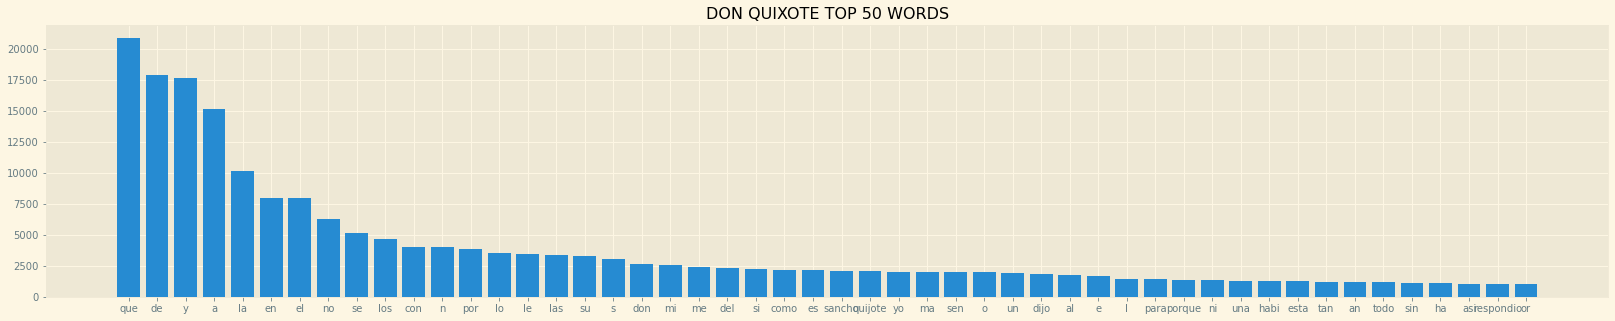

In [99]:
top_words = 50

with plt.style.context('Solarize_Light2'):
    plt.figure(figsize=(28,5))
    plt.title("DON QUIXOTE TOP {top} WORDS".format(top=top_words))
    dataframe_words_metrics_top = dataframe_words_metrics[:top_words]
    plt.bar(dataframe_words_metrics_top.word, dataframe_words_metrics_top.word_freq)

### a.2) How many times is each word repeated?
We will create a Rank-Frequency plot that shows the distribution of word frequency by rank, in decreasing order of frequency. This is, a plot that shows each word'ds frequency (vertical axis) vs its frequency ranking (horizontal axis).

As we can see, most of the words have a low frequency while few words are repeated many times. 

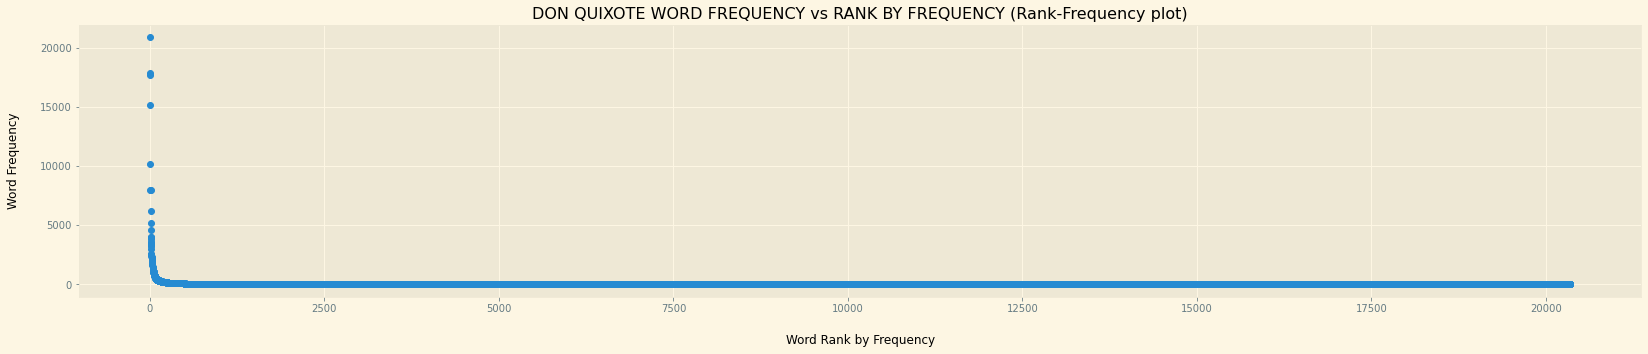

In [100]:
# Lets plot the total frequency of each word
with plt.style.context('Solarize_Light2'):
    plt.figure(figsize=(28,5))
    plt.title("DON QUIXOTE WORD FREQUENCY vs RANK BY FREQUENCY (Rank-Frequency plot)")
    plt.xlabel("Word Rank by Frequency", labelpad=20, color='black')
    plt.ylabel("Word Frequency", labelpad=20, color='black')
    plt.plot(dataframe_words_metrics.index+1, dataframe_words_metrics.word_freq, 'o') 

### a.3) What is Zipf's law? The Zipf's law in Don Quixote.

*Zipf's law (/zɪf/, German: [ts͡ɪpf]) is an empirical law formulated using mathematical statistics that refers to the fact that for many types of data studied in the physical and social sciences, the rank-frequency distribution is an inverse relation. The Zipfian distribution is one of a family of related discrete power law probability distributions. It is related to the zeta distribution, but is not identical.*
*Zipf's law was originally formulated in terms of quantitative linguistics, stating that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc. For example, in the Brown Corpus of American English text, the word "the" is the most frequently occurring word, and by itself accounts for nearly 7% of all word occurrences (69,971 out of slightly over 1 million). True to Zipf's Law, the second-place word "of" accounts for slightly over 3.5% of words (36,411 occurrences), followed by "and" (28,852). Only 135 vocabulary items are needed to account for half the Brown Corpus.*<br>
Source: https://en.wikipedia.org/wiki/Zipf%27s_law
<br>

Ver video: https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-3-zipfs-law-data-visualisation-fc9eadda71e7

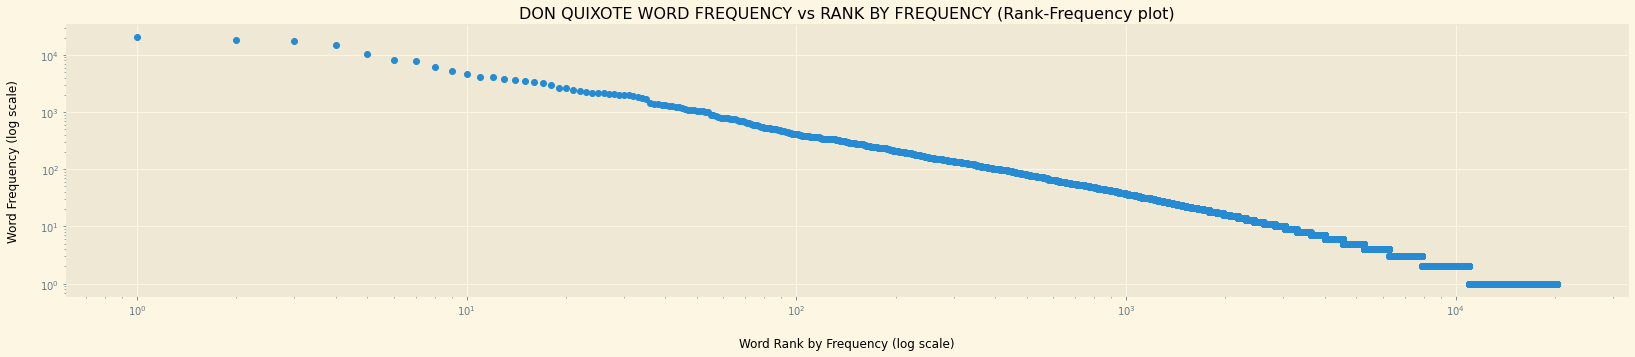

In [101]:
# Lets plot it again on log scale

#Therefore, it is a good idea to plot the horizontal axis on a log scale to appreciate the frequency 

with plt.style.context('Solarize_Light2'):
    plt.figure(figsize=(28,5))
    plt.title("DON QUIXOTE WORD FREQUENCY vs RANK BY FREQUENCY (Rank-Frequency plot)")
    plt.xlabel("Word Rank by Frequency (log scale)", labelpad=20, color='black')
    plt.ylabel("Word Frequency (log scale)", labelpad=20, color='black')
    plt.plot(dataframe_words_metrics.index+1, dataframe_words_metrics.word_freq, 'o')  
    plt.xscale('log')
    plt.yscale('log')

### a.4) What is an Hapax Legomenon? Hapax Legomenon in Don Quixote.

*In the novel Moby-Dick. About 44% of the distinct set of words in this novel, such as "matrimonial", occur only once, and so are hapax legomena (red). About 17%, such as "dexterity", appear twice (so-called dis legomena, in blue). Zipf's law predicts that the words in this plot should approximate a straight line with slope -1.*<br>
Source: https://en.wikipedia.org/wiki/Hapax_legomenon#:~:text=hapax%20legomena%3B%20sometimes%20abbreviated%20to,or%20in%20a%20single%20text


In Don Quixote hapax legomenon words (words that only appear once) like faisanes or zuzaban are prety common.
The hapax legomenon is composed by a set of 9341 words, which represent 45.944617% of the distinct set of words in this novel (both parts combined). This means that about 45% of the words only appear once while the remaining 55% words appear more than once.<br>


*In corpus linguistics, a hapax legomenon (/ˈhæpəks lɪˈɡɒmɪnɒn/ also /ˈhæpæks/ or /ˈheɪpæks/;[1][2] pl. hapax legomena; sometimes abbreviated to hapax, plural hapaxes) is a word or an expression that occurs only once within a context: either in the written record of an entire language, in the works of an author, or in a single text. The term is sometimes incorrectly used to describe a word that occurs in just one of an author's works but more than once in that particular work. Hapax legomenon is a transliteration of Greek ἅπαξ λεγόμενον, meaning "being said once".
The related terms dis legomenon, tris legomenon, and tetrakis legomenon respectively (/ˈdɪs/, /ˈtrɪs/, /ˈtɛtrəkɪs/) refer to double, triple, or quadruple occurrences, but are far less commonly used.*
Source: https://en.wikipedia.org/wiki/Hapax_legomenon#:~:text=hapax%20legomena%3B%20sometimes%20abbreviated%20to,or%20in%20a%20single%20text

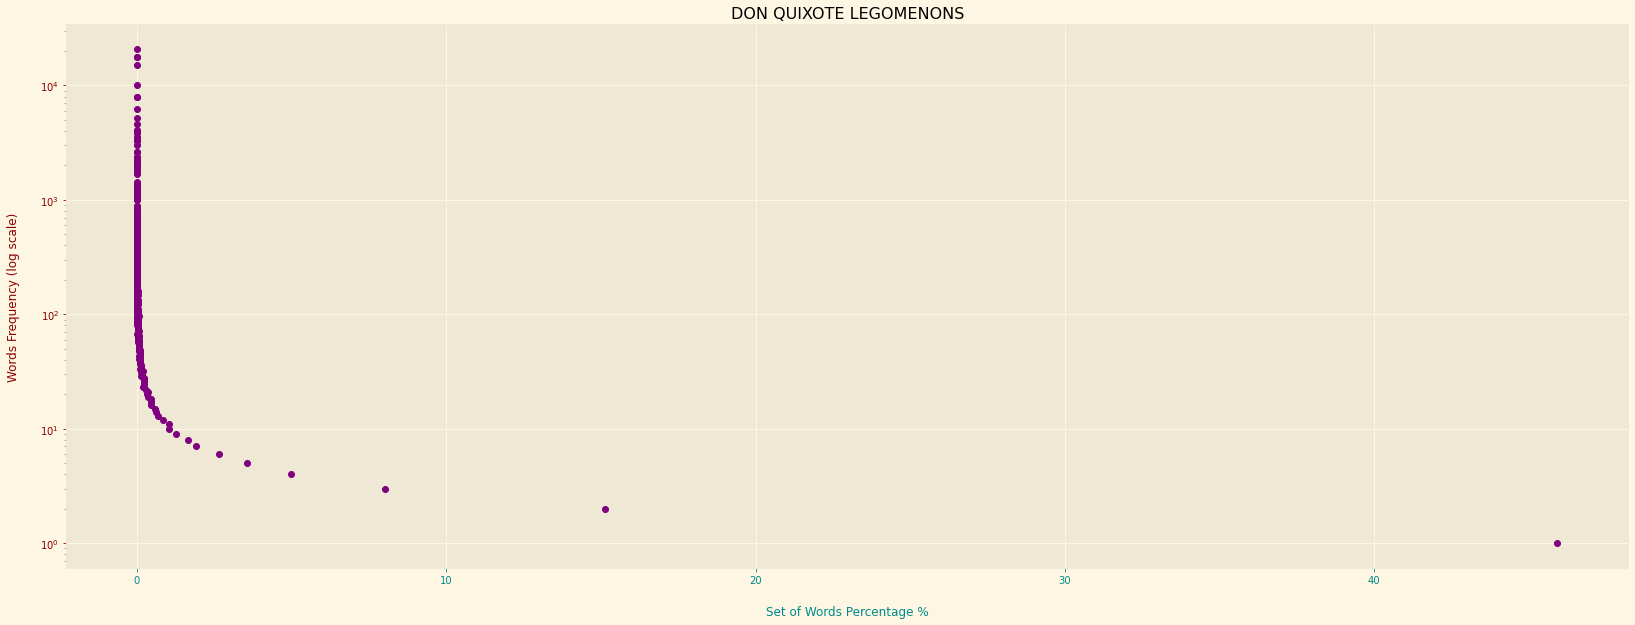

In [102]:
from matplotlib import pyplot as plt, ticker as mticker

with plt.style.context('Solarize_Light2'):
    plt.figure(figsize=(28,10))
    plt.scatter(x=dataframe_wordscount_countfreq['word_count_%'], 
                y=dataframe_wordscount_countfreq['word_freq'], color='purple')
    plt.title("DON QUIXOTE LEGOMENONS")
    plt.xlabel("Set of Words Percentage %", labelpad=20, color='darkcyan')
    plt.ylabel("Words Frequency (log scale)", labelpad=20, color='darkred')
    ax = plt.gca()
    ax.tick_params(axis='x', colors='darkcyan')
    ax.tick_params(axis='y', colors='darkred')
    #plt.xscale('log')
    plt.yscale('log')
    plt.show()

## B) Word Analysis

### b.1) What is the word's lenght distribution?

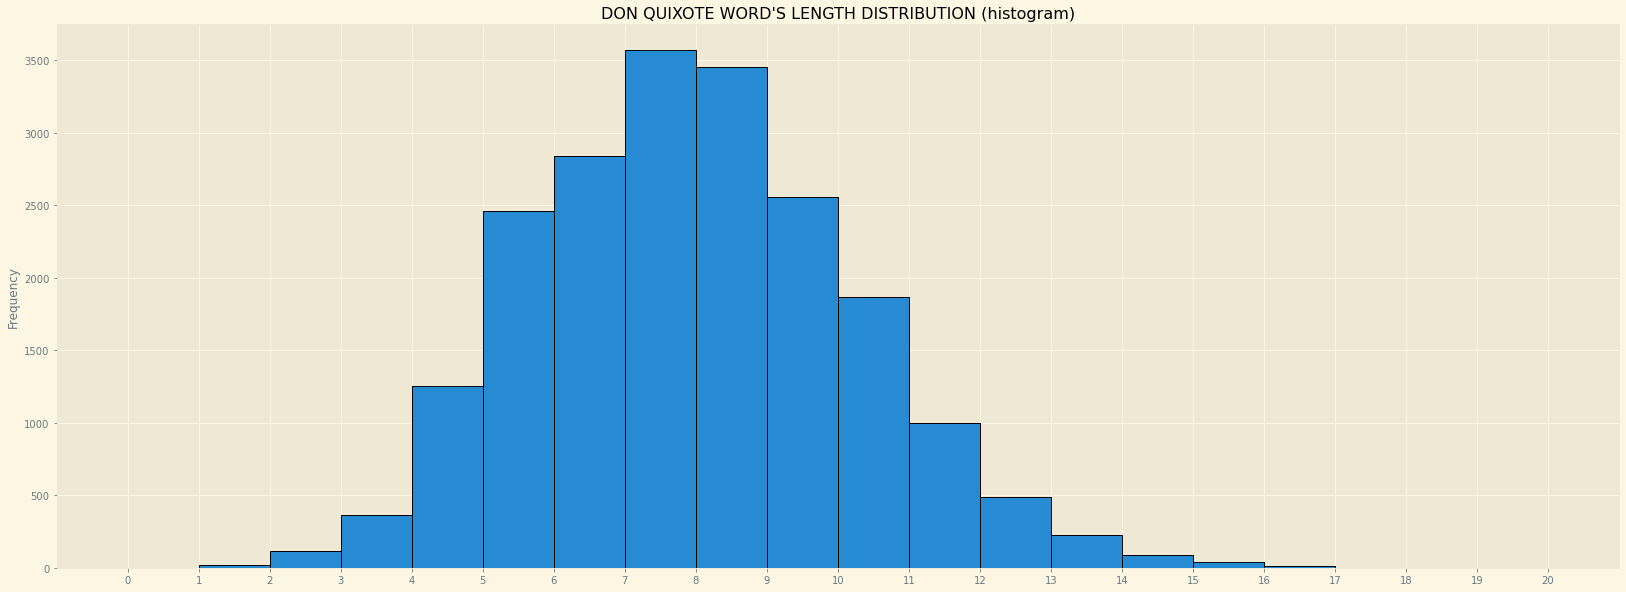

In [115]:
with plt.style.context('Solarize_Light2'):
    plt.figure(figsize=(28,10))
    plt.title("DON QUIXOTE WORD'S LENGTH DISTRIBUTION (histogram)")
    max_word_length = max(dataframe_words_metrics.word_length)
    bins=np.arange(0, max_word_length, 1)
    dataframe_words_metrics.word_length.plot.hist(grid=True, bins=bins, ec="k")
    plt.xticks(bins);

In [ ]:
Spacy
https://gist.github.com/harpiechoise/96e546573e872cf558befab61ee9082e